In [1]:
import pandas as pd
import numpy as np


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r'C:\Users\omkar\OneDrive\Documents\Internship\New\Sentiment_140 (2).csv')

Original column names: Index(['A', 'B', 'C', 'D', 'E', 'reviews'], dtype='object')
Updated column names: Index(['A', 'B', 'C', 'D', 'E', 'review'], dtype='object')
Column renaming completed and results saved to 'updated_dataset.csv'.


In [4]:
df = pd.read_csv(r'C:\Users\omkar\OneDrive\Documents\Internship\New\sentiment_140.csv')

In [4]:
df.head(5)

,review,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,@grazzly maaaaaate will you be at Glasto? Not ...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
1,@Monkeylover35 Yeah. I had to get away for a b...,POSITIVE,NaN,NaN,NaN,NaN,NaN
2,The World is just amazing!,POSITIVE,NaN,NaN,NaN,NaN,NaN
3,Just picked my sister up from work. she's al...,NEGATIVE,NaN,NaN,NaN,NaN,NaN
4,I don't think changing my last name is meant t...,NEGATIVE,NaN,NaN,NaN,NaN,NaN


In [5]:
if 'review' not in df.columns:
    raise ValueError("Dataset must contain a 'review' column")

In [6]:
from textblob import TextBlob

In [7]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [8]:
df['predicted_sentiment'] = df['review'].apply(get_sentiment)

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [10]:
import matplotlib.pyplot as plt


In [12]:
df['predicted_sentiment'] = df['predicted_sentiment'].apply(lambda x: "POSITIVE" if x >= 0 else "NEGATIVE")

              precision    recall  f1-score   support

    NEGATIVE       0.91      0.34      0.49     74042
    POSITIVE       0.37      0.92      0.52     30816

    accuracy                           0.51    104858
   macro avg       0.64      0.63      0.51    104858
weighted avg       0.75      0.51      0.50    104858



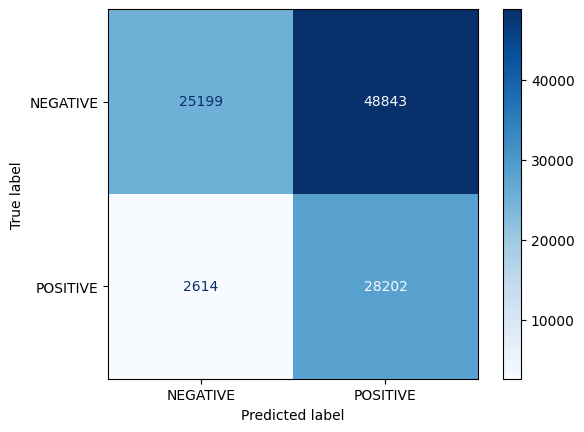

In [13]:
print(classification_report(df['sentiment'],df['predicted_sentiment']))
cm = confusion_matrix(df['sentiment'],df['predicted_sentiment'], labels=["NEGATIVE", "POSITIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEGATIVE", "POSITIVE"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
df.to_csv('SENTIMENT140_sentiment.csv', index=False)


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sid = SentimentIntensityAnalyzer()

In [18]:
if 'review' not in df.columns:
    raise ValueError("Dataset must contain a 'review' column")

In [19]:
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

In [20]:
df['vader_predicted_sentiment'] = df['review'].apply(get_vader_sentiment)


In [23]:
df['vader_predicted_sentiment'] = df['vader_predicted_sentiment'].apply(lambda x: "POSITIVE" if x >= 0 else "NEGATIVE")

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.45      0.61     74042
    POSITIVE       0.41      0.90      0.56     30816

    accuracy                           0.59    104858
   macro avg       0.66      0.68      0.58    104858
weighted avg       0.77      0.59      0.59    104858



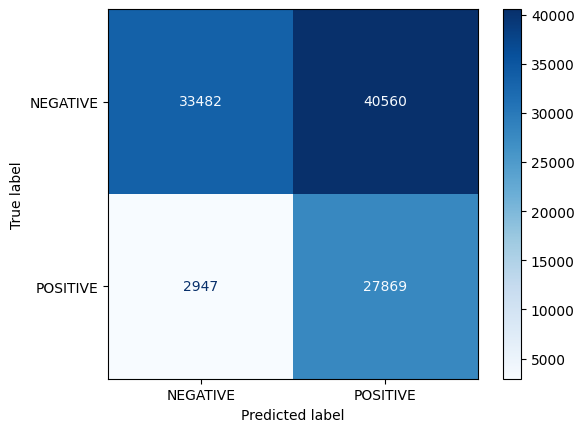

In [36]:
print(classification_report(df['sentiment'],df['vader_predicted_sentiment']))
cm = confusion_matrix(df['sentiment'],df['vader_predicted_sentiment'], labels=["NEGATIVE", "POSITIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEGATIVE", "POSITIVE"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
df.to_csv('SENTIMENT140_vader_sentiment.csv', index=False)

In [25]:
from transformers import pipeline

c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [27]:
from transformers import AutoTokenizer

In [28]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
MAX_LENGTH = 512

In [29]:
def get_hf_sentiment(text):
    tokens = tokenizer.tokenize(text)
    if len(tokens) > MAX_LENGTH:
        tokens = tokens[:MAX_LENGTH]
    truncated_text = tokenizer.convert_tokens_to_string(tokens)
    result = sentiment_pipeline(truncated_text)[0]
    hf_sentiment = result['label']
    score = result['score']
    return hf_sentiment, score

In [30]:
sampled_df = df.sample(frac=0.03, random_state=42)


In [32]:
import tqdm

In [35]:
sampled_df[['hf_sentiment', 'score']] = sampled_df['review'].progress_apply(lambda x: pd.Series(get_hf_sentiment(str(x))))

100%|██████████| 3146/3146 [00:56<00:00, 55.22it/s]


In [44]:
sampled_df.to_csv('SENTIMENT140_with_HF_sentiment.csv', index=False)

In [33]:
from tqdm import tqdm

In [34]:
tqdm.pandas()

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      2202
    POSITIVE       1.00      1.00      1.00       944

    accuracy                           1.00      3146
   macro avg       1.00      1.00      1.00      3146
weighted avg       1.00      1.00      1.00      3146



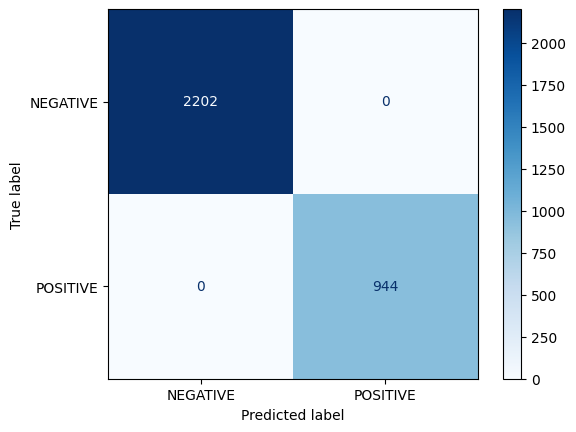

In [38]:
print(classification_report(sampled_df['sentiment'],sampled_df['hf_sentiment']))
cm = confusion_matrix(sampled_df['sentiment'],sampled_df['hf_sentiment'], labels=["NEGATIVE", "POSITIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEGATIVE", "POSITIVE"])
disp.plot(cmap=plt.cm.Blues)
plt.show()